#Surge Price prediction of a cab aggregator.

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_colwidth', 800)

In [2]:
# loading the dataset
df = pd.read_csv('train.csv')
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [3]:
# checking the number of rows and columns in the dataframe
df.shape

(131662, 14)

In [4]:
# checking the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [5]:
# To check the presence of null values 
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [7]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [8]:
#Checking the missing values
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [9]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [10]:
col = ['Customer_Since_Months', 'Life_Style_Index'] 

In [11]:
# using statistics method (median)
def impute_nan(df, feat):
    m=df[feat].median()
    df[feat]=df[feat].fillna(m)

for i in col:
    impute_nan(df, i)

In [13]:
# Filling missing values with 0
df["Var1"].fillna(0,inplace=True)
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,2.79805,NaN,E,3.50125,2,0.0,56,77,Male,2
3,T0005689465,61.56,C,10.0,2.79805,NaN,A,3.45375,0,0.0,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [14]:
col = ['Type_of_Cab', 'Confidence_Life_Style_Index'] 

In [15]:
# handling missing value for categorical data
def impute_nan(df, feat):
    m=df[feat].mode()[0]
    df[feat]=df[feat].fillna(m)

for i in col:
    impute_nan(df, i)

In [16]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,B,10.0,2.79805,B,E,3.50125,2,0.0,56,77,Male,2
3,T0005689465,61.56,C,10.0,2.79805,B,A,3.45375,0,0.0,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


## FEATURE ENGINEERING

In [17]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [18]:
# converting the label to numerical category using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type_of_Cab'] = le.fit_transform(df['Type_of_Cab'])


In [19]:
df['Confidence_Life_Style_Index'] = le.fit_transform(df['Confidence_Life_Style_Index'])

In [20]:
df['Destination_Type'] = le.fit_transform(df['Destination_Type'])

In [21]:
df['Gender'] = le.fit_transform(df['Gender'])

In [22]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,1,1.0,2.42769,0,0,3.90500,0,40.0,46,60,0,2
1,T0005689461,29.47,1,10.0,2.78245,1,0,3.45000,0,38.0,56,78,1,2
2,T0005689464,41.58,1,10.0,2.79805,1,4,3.50125,2,0.0,56,77,1,2
3,T0005689465,61.56,2,10.0,2.79805,1,0,3.45375,0,0.0,52,74,1,3
4,T0005689467,54.95,2,10.0,3.03453,1,0,3.40250,4,51.0,49,102,1,2


In [23]:
# trip id is unique. so dropping the feature
df.drop(['Trip_ID'], axis=1, inplace=True)

In [24]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

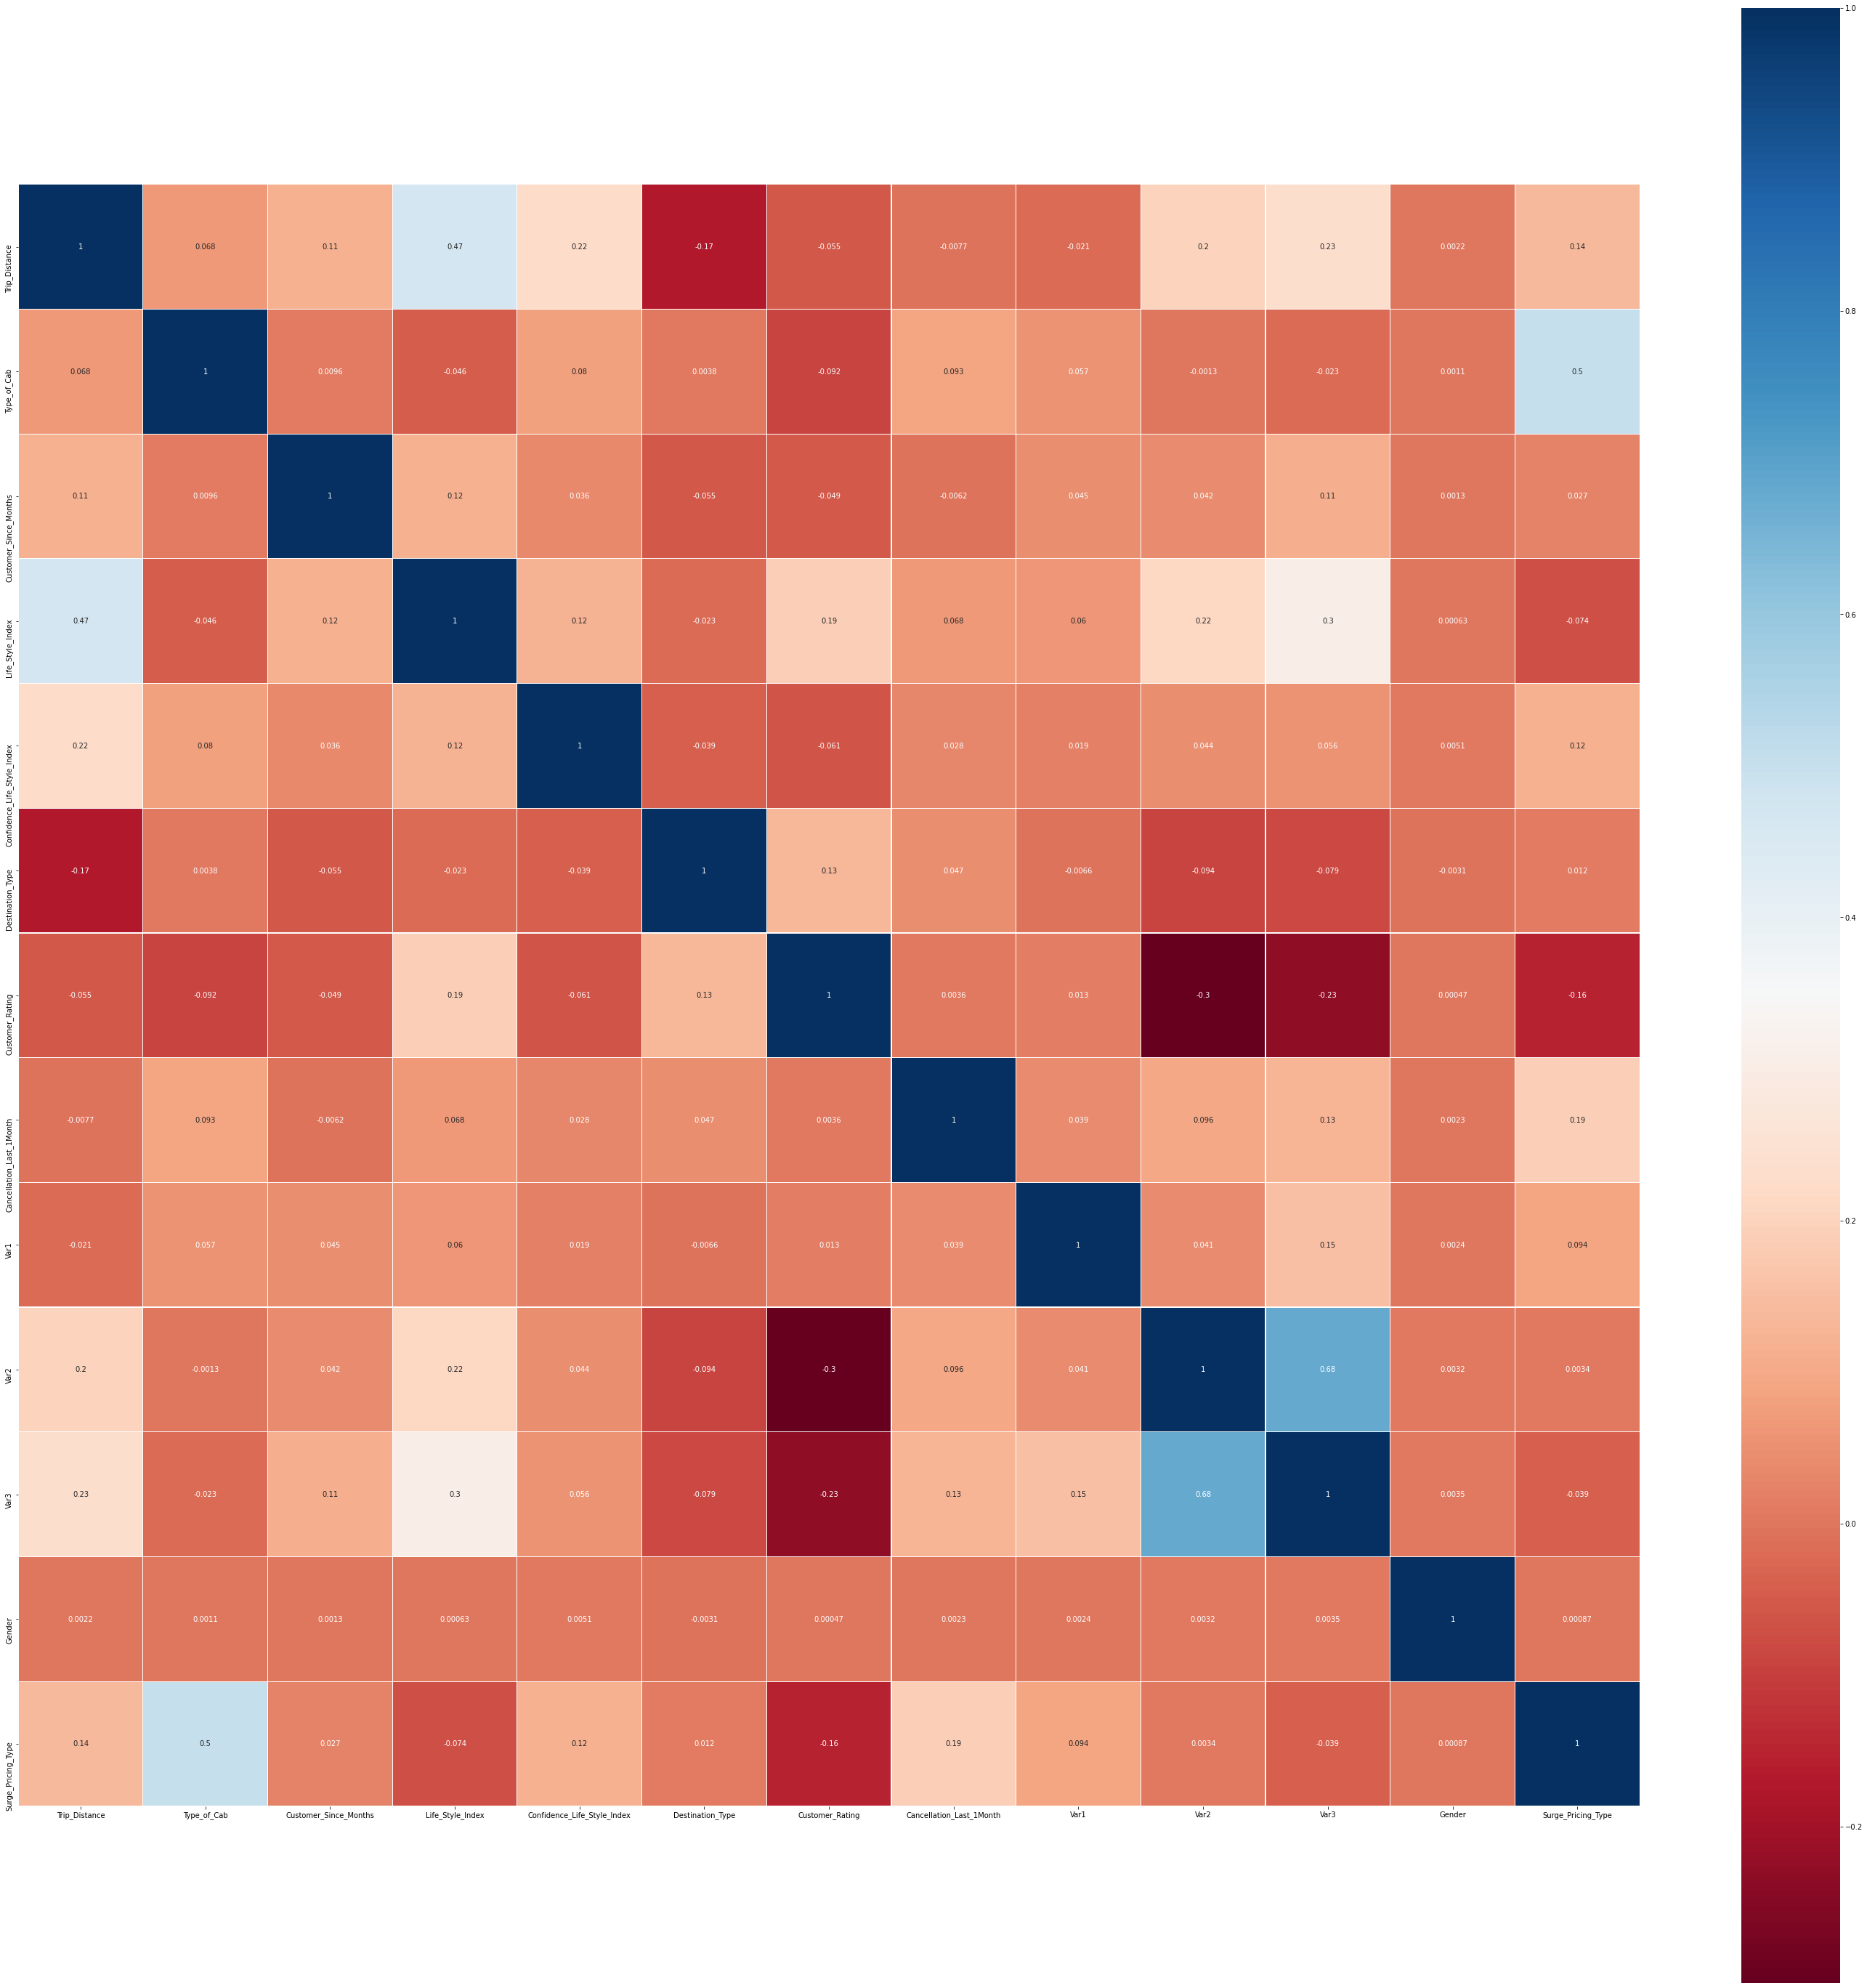

In [63]:
#checking how much the input variable is strongly correlated with target variable
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [26]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [27]:
x=df.drop(['Surge_Pricing_Type'], axis = 1)
y=df['Surge_Pricing_Type']
x.shape, y.shape

((131662, 12), (131662,))

## TRAIN-TEST SPLIT

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

## MODEL BUILDING  USING RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1600)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.6897049329738351
